In [5]:
import os
from os.path import join

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('paper.mcstyle')
import seaborn as sns

import numpy as np

In [6]:
import ili

## Posterior/Likelihood example

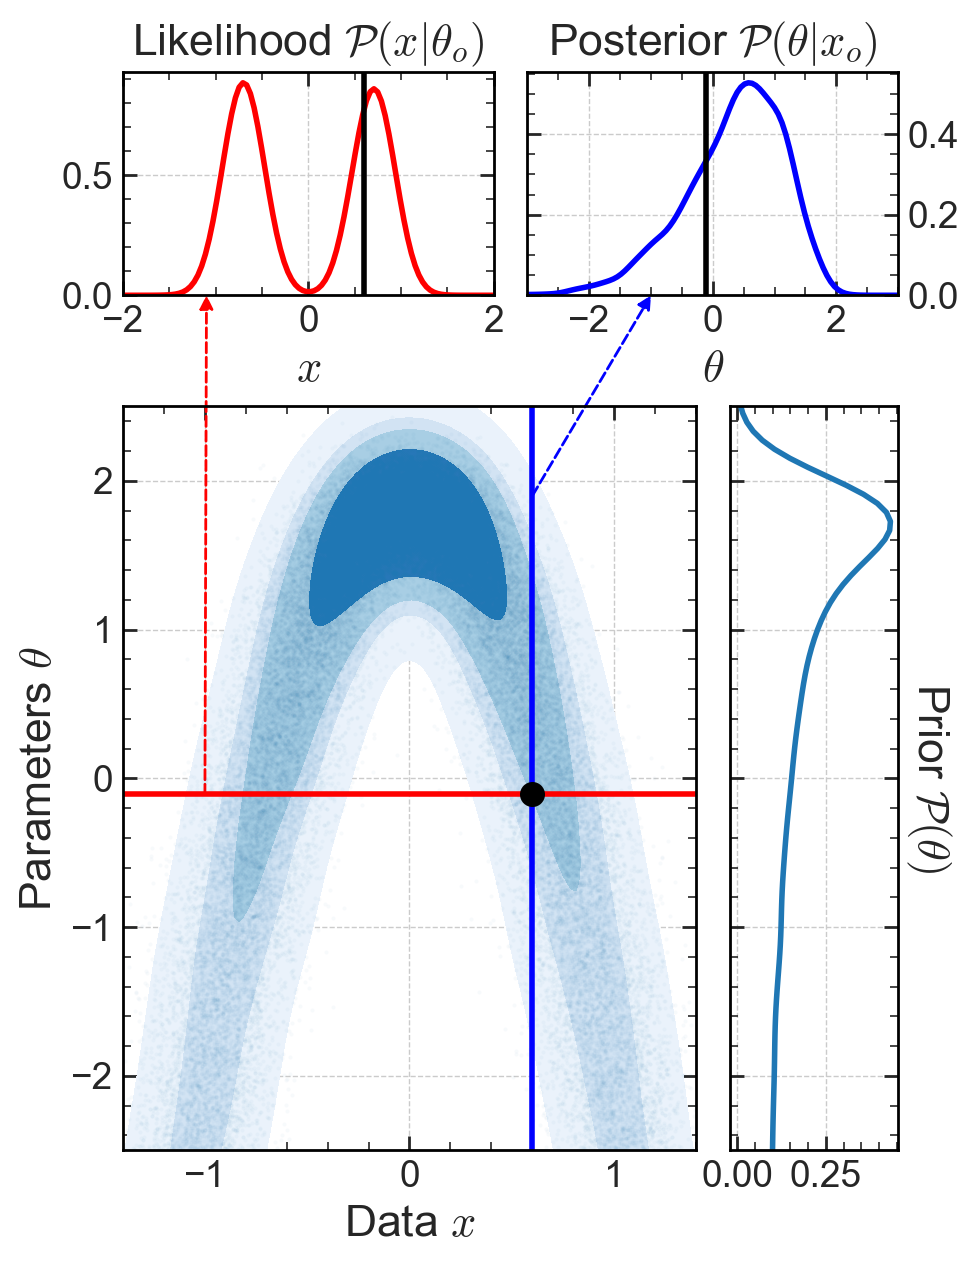

In [200]:
from sklearn.datasets import make_s_curve
from scipy.stats import gaussian_kde
from matplotlib.patches import ConnectionPatch

N, noise = 50000, 0.15
eps = 0.1
x_ = np.random.uniform(-1.2,1.2,N)
y_ = 1.9-(x_*2)**2 
data = np.vstack([x_, y_]).T
data += np.random.normal(0, noise, size=data.shape)

# find a sampled point near x0 and y0
x0, y0 = 0.6,-0.1
idx = np.argmin(np.linalg.norm(data - np.array([x0, y0]), axis=1))
x0, y0 = data[idx]

f = plt.figure(figsize=(5,7))
gs = mpl.gridspec.GridSpec(2,4, wspace=0.2, hspace=0.23, height_ratios=[0.3, 1])

# plot joint
ax = f.add_subplot(gs[1,:3])
ax.plot(data[:, 0], data[:, 1], '.', ms=1, alpha=0.03, rasterized=True)
sns.kdeplot(x=data[:, 0], y=data[:, 1], fill=True,
            ax=ax, n_levels=5, cmap='Blues')
ax.axvline(x0, color='b', linestyle='-')
ax.axhline(y0, color='r', linestyle='-')
ax.plot(x0, y0, 'ko', markersize=8)
ax.set_xlabel('Data $x$')
ax.set_ylabel(r'Parameters $\theta$')
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-2.5, 2.5)
axbase = ax

# plot prior
ax = f.add_subplot(gs[1,3:])
gkde = gaussian_kde(data[:,1])
x_ = np.linspace(-3, 3, 100)
ax.plot(gkde(x_), x_)
# ax.set_xlim(0,0.35)
ax.set_ylim(-2.5, 2.5)
ax.set_yticklabels([])
ax.yaxis.set_label_position('right')
# ax.set_xlabel('PDF')
ax.set_ylabel(r'Prior $\mathcal{P}(\theta)$', rotation=-90, labelpad=20)

# plot posterior
ax = f.add_subplot(gs[0,2:])
mask = np.abs(data[:,0] - x0) < eps
y_ = data[mask,1]
gkde = gaussian_kde(y_)
x_ = np.linspace(-3, 3, 100)
ax.plot(x_, gkde(x_), 'b-')
ax.axvline(y0, color='k', linestyle='-')
ax.set_xlim(-3, 3)
ax.set_ylim(0)
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.set_xlabel(r'$\theta$')
# ax.set_ylabel('PDF')
ax.set_title(r'Posterior $\mathcal{P}(\theta|x_o)$', fontsize='medium')
axpos = ax


# plot likelihood
ax = f.add_subplot(gs[0,:2])
mask = np.abs(data[:,1] - y0) < eps
y_ = data[mask,0]
gkde = gaussian_kde(y_)
x_ = np.linspace(-2, 2, 100)
ax.plot(x_, gkde(x_), 'r-')
ax.axvline(x0, color='k', linestyle='-')
ax.set_xlim(-2,2)
ax.set_ylim(0)
ax.set_xlabel(r'$x$')
# ax.set_ylabel('PDF')
ax.set_title(r'Likelihood $\mathcal{P}(x|\theta_o)$', fontsize='medium')
axlik = ax

# plot connectors
con = ConnectionPatch(
    xyA=(-1, y0), xyB=(-1.1,0), 
    coordsA=axbase.transData, coordsB=axlik.transData,
    axesA=axbase, axesB=axlik, color="r",
    linestyle='--', arrowstyle="-|>")
axbase.add_artist(con)

con = ConnectionPatch(
    xyA=(x0, 1.9), xyB=(-1,0), 
    coordsA=axbase.transData, coordsB=axpos.transData,
    axesA=axbase, axesB=axpos, color="b",
    linestyle='--', arrowstyle="-|>")
axbase.add_artist(con)

f.savefig('figures/example.pdf', bbox_inches='tight')

In [10]:
data.shape

AttributeError: 'tuple' object has no attribute 'shape'